## Exploratory Data Analysis
Carrie Feng, Oliver Meek, & Tara Udani

### 1. Define Your Audience / Stakeholder 

Clinicians, surgeons, researchers, physical therapists. Anyone who would be able to help ACLR patients recover.

### 2. Define Your Problem Statement

To gauge recovery, orthopedic surgeons measure the flexion and extension strength of impacted knees. Do knee flexion strength and extension strength progress differently during recovery? I.E. Should surgeons and physical therapists focus on one type of strength over the other during rehabilitation? (comparing physical and psychological readiness)

### 3. Identify Important Variables

There are several general variables that are necessary to understand this dataset and demographics of patients:
* 'record_id': unique identifier for each patient
* 'sex_dashboard': the sex of the patient
* 'age' : the age of the patient.

In addition to mere demographics, there are several variables that specifically pertain to our research question:
* measures of flexion and extension strength (lsi is used to account for differences from patient to patient):
  * 'lsi_ext_mvic_60'
  * 'lsi_flex_mvic_60'
  * 'lsi_ext_isok_60'
  * 'lsi_flex_isok_60'
  
* 'tss' and 'tss_dashboard' are continuous and categorical versions of the time since surgery data was recorded.
* more holistic or psychological measures of recovery:
  * 'ikdc'
  * 'acl_rsi'

### 4. Merge & Clean the Dataset

In [77]:
import pandas as pd

In [78]:
aclr_orig = pd.read_csv('aclr_data.csv')

In [ ]:
# drop the columns that aren't relevant to our research question
col_list = ['record_id', 'sex_dashboard', 'age', 'age_group', 'tss', 'tss_dashboard', 'ikdc', 'acl_rsi']
lsi_list = [col for col in aclr_orig.columns if 'lsi' in col and '_l' not in col]
final_list = col_list + lsi_list
aclr_used = aclr_orig[final_list]

,record_id,sex_dashboard,age,age_group,tss,tss_dashboard,ikdc,acl_rsi,lsi_ext_mvic_90,lsi_ext_mvic_60,lsi_flex_mvic_60,lsi_ext_isok_60,lsi_flex_isok_60
0,1,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,21.700000,5.0,13.7,13 to 24 months,95.4,87.5,92.73,NaN,NaN,87.860000,103.320000
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,NaN,14.500000,2.0,7.6,5 to 7 months,79.3,8.3,NaN,NaN,NaN,45.000000,72.980000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11145,4737,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11146,4737,NaN,17.966667,3.0,6.9,5 to 7 months,NaN,NaN,NaN,NaN,NaN,39.470109,92.639594
11147,4738,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11148,4738,NaN,15.750000,3.0,5.9,5 to 7 months,NaN,54.0,NaN,NaN,NaN,85.435897,99.436090


In [82]:
#use record_id to fill in missing values for sex and age_group
aclr = aclr_used[final_list].copy()
aclr['sex_dashboard'] = aclr.groupby('record_id')['sex_dashboard'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
aclr['age_group'] = aclr.groupby('record_id')['age_group'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [83]:
aclr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11150 entries, 0 to 11149
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   record_id         11150 non-null  int64  
 1   sex_dashboard     11146 non-null  object 
 2   age               5126 non-null   float64
 3   age_group         9258 non-null   float64
 4   tss               5125 non-null   float64
 5   tss_dashboard     5237 non-null   object 
 6   ikdc              2951 non-null   float64
 7   acl_rsi           3400 non-null   float64
 8   lsi_ext_mvic_90   698 non-null    float64
 9   lsi_ext_mvic_60   1019 non-null   float64
 10  lsi_flex_mvic_60  1009 non-null   float64
 11  lsi_ext_isok_60   2227 non-null   float64
 12  lsi_flex_isok_60  2222 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 1.1+ MB


In [84]:
#age group should be a category variable
aclr['age_group'] = aclr['age_group'].astype('category')

In [85]:
aclr.head()

,record_id,sex_dashboard,age,age_group,tss,tss_dashboard,ikdc,acl_rsi,lsi_ext_mvic_90,lsi_ext_mvic_60,lsi_flex_mvic_60,lsi_ext_isok_60,lsi_flex_isok_60
0,1,Male,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Male,21.7,5.0,13.7,13 to 24 months,95.4,87.5,92.73,NaN,NaN,87.86,103.32
2,1,Male,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Female,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Female,14.5,2.0,7.6,5 to 7 months,79.3,8.3,NaN,NaN,NaN,45.00,72.98


### 5. Descriptive Statistics & Distributions

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#first, let's check out the descriptive statistics of numeric variables
aclr[['age', 'ikdc', 'acl_rsi', 'lsi_ext_mvic_90', 'lsi_ext_mvic_60', 
      'lsi_flex_mvic_60', 'lsi_ext_isok_60', 'lsi_flex_isok_60']].describe()

,age,ikdc,acl_rsi,lsi_ext_mvic_90,lsi_ext_mvic_60,lsi_flex_mvic_60,lsi_ext_isok_60,lsi_flex_isok_60
count,5126.000000,2951.000000,3400.000000,698.000000,1019.000000,1009.00,2227.000000,2222.000000
mean,20.184761,78.457377,64.929381,81.419513,77.597674,inf,73.194083,89.728019
std,8.195323,14.480813,24.719550,20.612946,26.961478,NaN,22.286270,18.970152
min,8.855556,16.100000,-0.100000,20.510000,13.390000,25.32,10.967185,22.550000
25%,15.925694,70.000000,48.300000,69.545000,61.065000,67.53,58.505000,79.000000
50%,17.439444,80.500000,67.500000,82.445000,77.660000,80.21,73.800000,90.000000
75%,20.700000,90.000000,85.800000,92.942500,92.950000,93.48,86.395000,100.301858
max,67.220000,100.000000,100.000000,287.820000,236.510000,inf,247.370000,311.110000


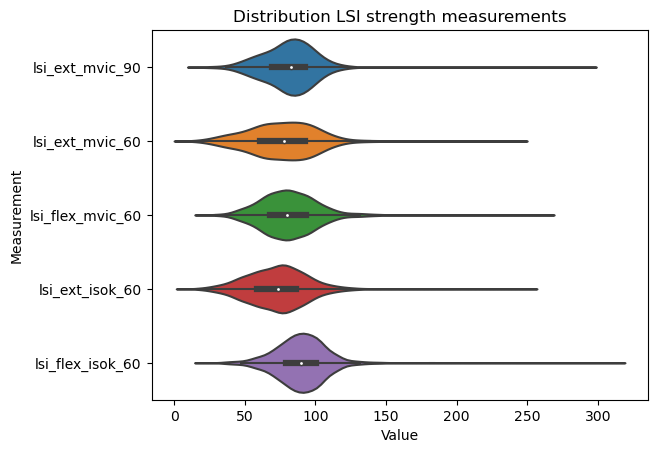

In [92]:
#now to look at some distributions in a visual way:
lsis = aclr[[col for col in aclr.columns if 'lsi' in col]].copy()
lsis = lsis.melt(var_name="Measurement", value_name="Value")
lsis.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
lsis.dropna(inplace=True)

sns.violinplot(data=lsis, x="Value", y="Measurement")
plt.title("Distribution LSI strength measurements")
plt.show()


Text(0.5, 1.0, 'Distribution of IKDC scores')

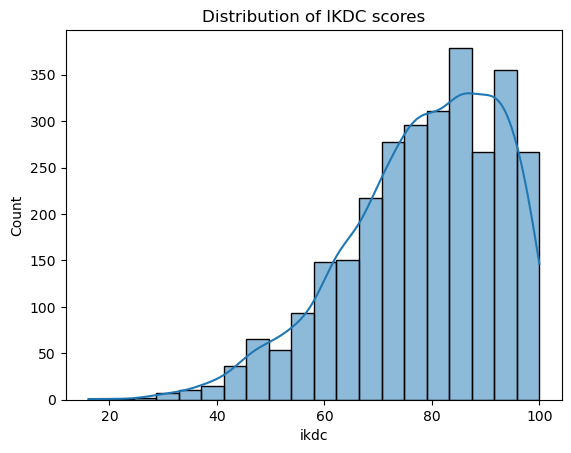

In [93]:
#create a histogram for the ikdc scores
sns.histplot(data=aclr, x="ikdc", bins=20, kde=True)
plt.title("Distribution of IKDC scores")

Text(0.5, 1.0, 'Distribution of RSI scores')

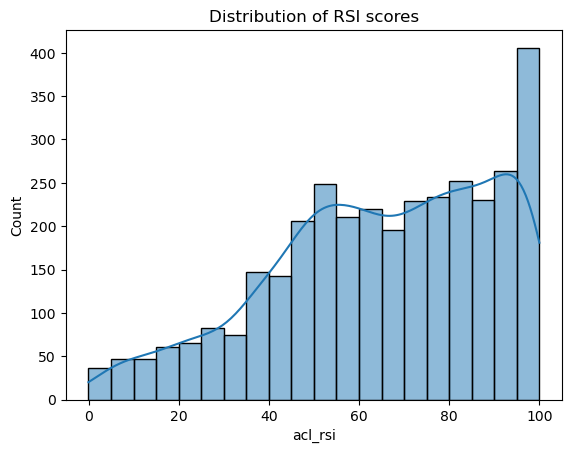

In [94]:
#create a histogram for the rsi scores
sns.histplot(data=aclr, x="acl_rsi", bins=20, kde=True)
plt.title("Distribution of RSI scores")

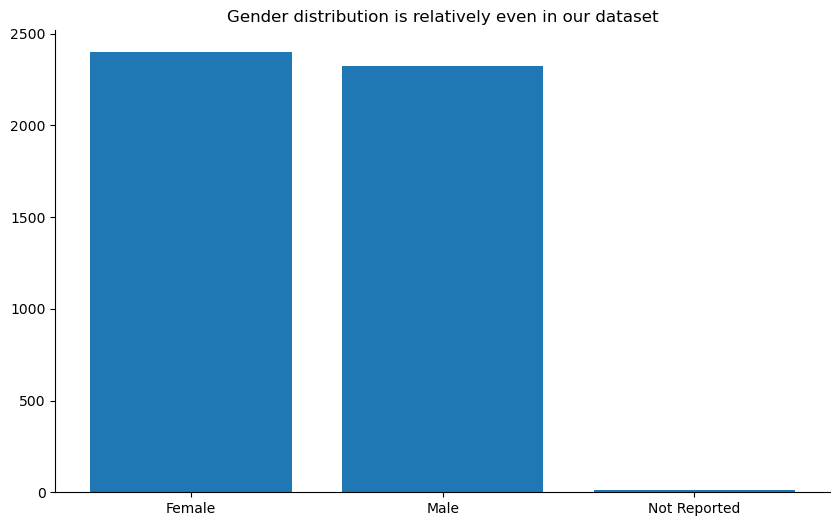

In [104]:
#lets check the gender distribution of patients in the dataset
sex_counts = aclr_orig['sex_dashboard'].value_counts() #aclr_orig used so patients that had more than one visit aren't overrepresented
plt.figure(figsize=(10, 6))
plt.bar(sex_counts.index, sex_counts.values)
plt.title('Gender distribution is relatively even in our dataset')
sns.despine()

Text(0.5, 1.0, 'Despite outliers, most patients were seen less than 10 months post-op')

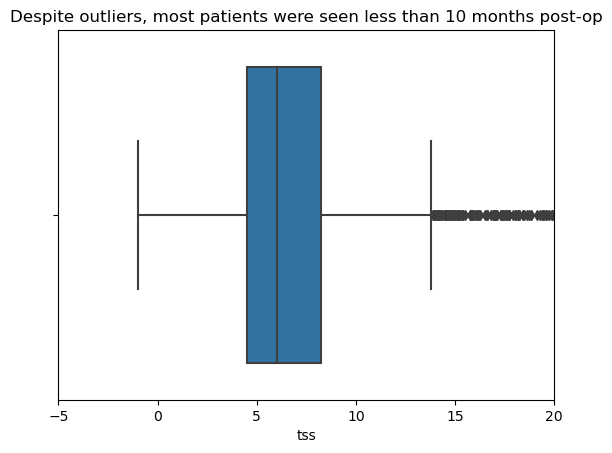

In [103]:
#lastly, let's check out the distribution of when patients were seen with
# a box and whisker plot
sns.boxplot(data=aclr, x="tss")
plt.xlim(-5, 20)
plt.title('Despite outliers, most patients were seen less than 10 months post-op')

### 6. Examine Correlations (if relevant)

### 7. Explore Relationships (if relevant)